In [1]:
# changing cwd
%cd ..

c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp


## Load packages

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

cmap = 'PRGn'

from itertools import product

In [3]:
from src.inductive_bias import IB
ib = IB() #instantiate inductive bias package

[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SimulationData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\PosteriorData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\TrainedCLF.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\EstimatedData.pickle ] loaded
[ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\HellingerData.pickle ] loaded
Size of the S-XOR: (6322,)                    
Size of the Spiral: (6276,)                    
Size of the whole dataset: (12598, 7)

Size of the S-XOR after adding hellinger: (6322, 8)            
Size of the Spiral after adding hellinger: (6276, 8)


## Time and Date of the experiment

In [4]:
print(ib.date)

2021-04-08 09:05:24.083970


## In order to simulate human behavioral experiment in the ML setting, the models were trained 126 times on 126 different simulation datasets with the same parameter. Then, 100 random points from the posterior probability on grid were sampled 126 times. The same happened for hellinger distance computation

In [5]:
reps = 126
saved_clf = ib.clf
uX = ib.mask
uX0, uX1 = uX[:,0], uX[:,1]

N_sample = round(100/3600 * ib.estpst[1][0][3].shape[0]) #sample the same proportion

label = ib.mtype[:3] + ['Human'] #excluding QDA
fsize= 18

## Get trained model profile

In [6]:
ib.get_sampledData(saved_clf=saved_clf, reps=reps, N_sample=N_sample)


saving current attributes..
completed after 3 seconds
saved as [ c:\Users\jongm\Desktop\temp_workspace\Python\JOVO\induced_bias_exp\clf\SampledData.pickle ]


In [24]:
                    idx = np.arange(0, len(switch)) 
                    idx = idx[switch.astype(bool)]

4

In [10]:
ib.estpst_sample[0][0].shape

(2588544, 3)

In [13]:
ib.estpst_sample[0][0].shape, ib.hdist_sample[0][0].shape
ib.estpst_sample

[[array([[ 3.4       ,  0.9       ,  0.5330357 ],
         [ 1.46      ,  1.56      ,  0.64486342],
         [-2.33      ,  2.3       ,  0.53304072],
         ...,
         [-1.35      , -2.23      ,  0.48478777],
         [ 3.96      ,  0.28      ,  0.48616712],
         [ 0.87      , -3.99      ,  0.48616712]]),
  array([[ 3.77, -2.3 ,  0.  ],
         [-3.17,  1.03,  1.  ],
         [ 0.92,  3.04,  1.  ],
         ...,
         [ 3.14,  2.47,  1.  ],
         [-1.97,  0.58,  0.  ],
         [ 1.78, -3.67,  0.  ]]),
  array([[-0.22      ,  2.98      ,  0.92358631],
         [-2.42      , -2.96      ,  0.375     ],
         [ 3.31      , -1.52      ,  0.27170139],
         ...,
         [-0.11      ,  0.22      ,  0.05588942],
         [-3.35      ,  3.59      ,  0.75      ],
         [ 3.05      ,  0.9       ,  0.609375  ]]),
  array([[ 1.38      ,  3.77      ,  0.96559107],
         [ 0.11      , -1.73      ,  0.19367207],
         [ 1.32      ,  0.18      ,  0.58281484],
         .

In [7]:
ib.get_dataset()
ib.get_clf(param=saved_clf, fast=True)
ib.get_proba()
ib.get_hellinger()

In [114]:
def sample(dat, target, N):
    '''
    Takes N x 3
    '''
    temp_idx = np.arange(0, target.shape[0],1)
    idx_selected = np.random.choice(temp_idx, N)

    return np.vstack([dat, target[idx_selected]])

In [107]:
d = 2
m = len(ib.mtype)
seed = np.array([[],[],[]]).T
estpst_sample = [[seed for i in range(m)] for i in range(d)]

In [109]:
estpst_sample

[[array([], shape=(0, 3), dtype=float64),
  array([], shape=(0, 3), dtype=float64),
  array([], shape=(0, 3), dtype=float64),
  array([], shape=(0, 3), dtype=float64)],
 [array([], shape=(0, 3), dtype=float64),
  array([], shape=(0, 3), dtype=float64),
  array([], shape=(0, 3), dtype=float64),
  array([], shape=(0, 3), dtype=float64)]]

In [128]:
seed = np.array([[],[],[]]).T
estpst_sample = [[seed for i in range(m)] for i in range(d)]
hdist_sample = [[seed for i in range(m)] for i in range(d)]

for j_i, j in enumerate([2,4]):
    for i in range(len(ib.mtype)):
        dat_temp = np.column_stack([uX, ib.estpst[1][j][i]])
        estpst_sample[j_i][i] = sample(estpst_sample[j_i][i], dat_temp, N_sample)

        dat_temp = np.column_stack([uX, ib.hdist[1][j][i]])
        hdist_sample[j_i][i] = sample(hdist_sample[j_i][i], dat_temp, N_sample)

In [28]:
ib.estpst_sample[0][0][::4].shape

(647136,)

In [ ]:
ib.estpst_sample[0][0][:]

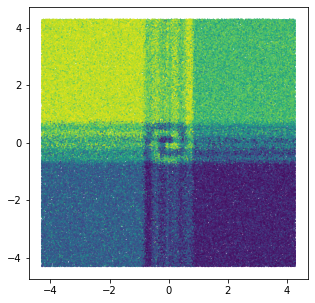

In [33]:
plt.figure(figsize=(5,5))
plt.scatter(x=ib.estpst_sample[0][2][::10][:,0],y=ib.estpst_sample[0][2][::10][:,1],c=ib.estpst_sample[0][2][::10][:,2],s=0.1)

In [139]:
# x=ib.estpst_sample[0][2][::10][:,0],y=ib.estpst_sample[0][2][::10][:,1],c=ib.estpst_sample[0][2][::10][:,2]



In [149]:
ib.mtype

['SVM', 'MLP', 'RF', 'QDA']

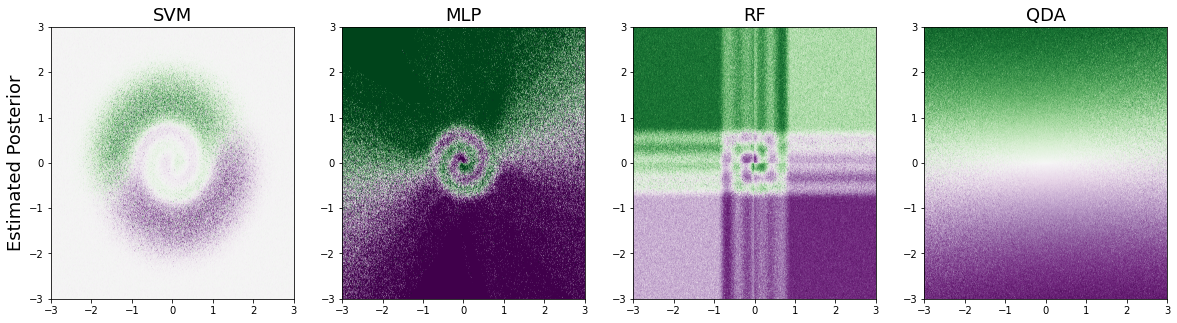

In [156]:
fig, axs = plt.subplots(1,4, figsize=(5*4,5))

for i, mod in enumerate(ib.mtype):
    tempxy3 = pointwise_gridAverage(ib.estpst_sample[0][i][::1])
    axs[i].scatter(x=tempxy3['x'],y=tempxy3['y'],c=tempxy3['c'],s=0.1,cmap='PRGn')
    axs[i].set_title(mod,fontsize=fsize)
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])
    axs[0].set_ylabel('Estimated Posterior',fontsize=fsize)
    plt.savefig(f'figs/[20210408_trainML_like_human]_averaged_126models_posterior_spiral_{str(ib.date.date())}.png', bbox_inches='tight')

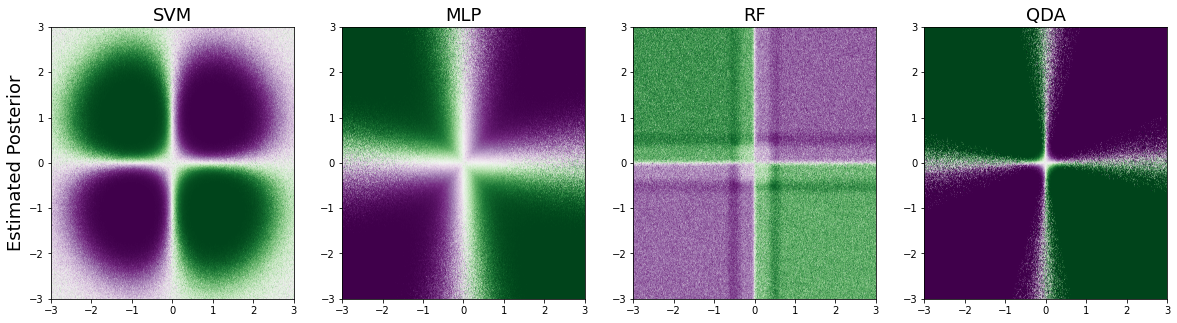

In [157]:
fig, axs = plt.subplots(1,4, figsize=(5*4,5))

for i, mod in enumerate(ib.mtype):
    tempxy3 = pointwise_gridAverage(ib.estpst_sample[1][i][::1])
    axs[i].scatter(x=tempxy3['x'],y=tempxy3['y'],c=tempxy3['c'],s=0.1,cmap='PRGn')
    axs[i].set_title(mod,fontsize=fsize)
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])
    axs[0].set_ylabel('Estimated Posterior',fontsize=fsize)
    plt.savefig(f'figs/[20210408_trainML_like_human]_averaged_126models_posterior_sxor_{str(ib.date.date())}.png', bbox_inches='tight')

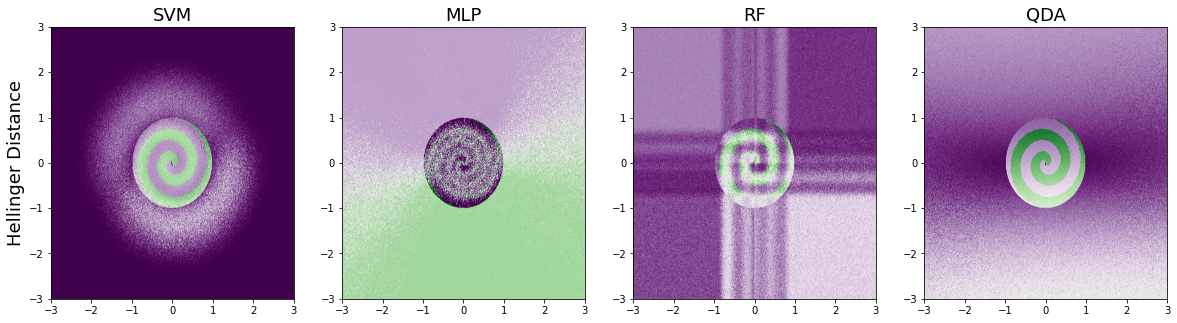

In [158]:
fig, axs = plt.subplots(1,4, figsize=(5*4,5))

for i, mod in enumerate(ib.mtype):
    tempxy3 = pointwise_gridAverage(ib.hdist_sample[0][i][::1])
    axs[i].scatter(x=tempxy3['x'],y=tempxy3['y'],c=tempxy3['c'],s=0.1,cmap='PRGn')
    axs[i].set_title(mod,fontsize=fsize)
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])
    axs[0].set_ylabel('Hellinger Distance',fontsize=fsize)
    plt.savefig(f'figs/[20210408_trainML_like_human]_averaged_126models_hellinger_spiral_{str(ib.date.date())}.png', bbox_inches='tight')

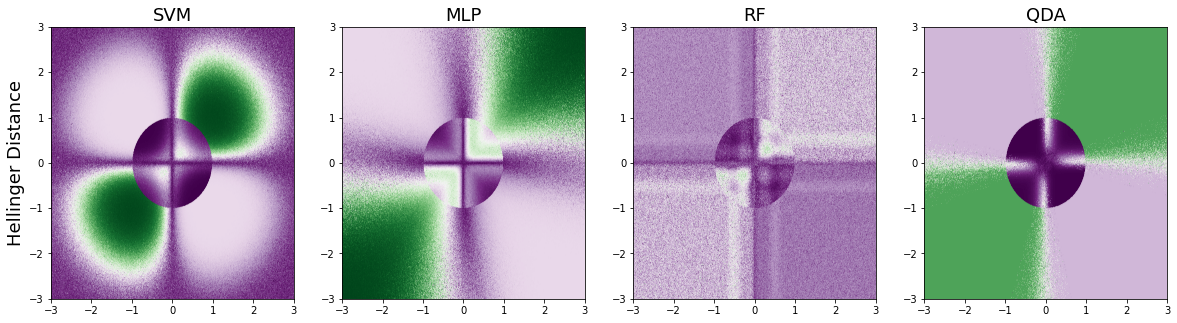

In [159]:
fig, axs = plt.subplots(1,4, figsize=(5*4,5))

for i, mod in enumerate(ib.mtype):
    tempxy3 = pointwise_gridAverage(ib.hdist_sample[1][i][::1])
    axs[i].scatter(x=tempxy3['x'],y=tempxy3['y'],c=tempxy3['c'],s=0.1,cmap='PRGn')
    axs[i].set_title(mod,fontsize=fsize)
    axs[i].set_xlim([-3,3])
    axs[i].set_ylim([-3,3])
    axs[0].set_ylabel('Hellinger Distance',fontsize=fsize)
    plt.savefig(f'figs/[20210408_trainML_like_human]_averaged_126models_hellinger_sxor_{str(ib.date.date())}.png', bbox_inches='tight')

In [89]:
tempxy = pd.DataFrame(np.column_stack([ib.human[0][:,3], ib.human[0][:,5]]).astype(float))#.drop_duplicates()
# #, ib.human[0][:,0]
# tempxy.shape

cc = ib.human[0][:,0][pd.DataFrame(np.column_stack([ib.human[0][:,3], ib.human[0][:,5]]).astype(float)).index].astype(float)

In [90]:
tempxy['xy'] = tempxy[0].astype(str).str.cat(tempxy[1].astype(str),sep=',')

In [91]:
tempxy['cc'] = cc

In [97]:
tempxy1 = tempxy.groupby('xy').mean()

In [98]:
tempxy1.reset

,0,1,cc
xy,,,
"-0.07,-0.16",-0.07,-0.16,0.490
"-0.07,-0.25",-0.07,-0.25,0.335
"-0.07,-0.34",-0.07,-0.34,0.000
"-0.07,-0.52",-0.07,-0.52,0.500
"-0.07,-0.61",-0.07,-0.61,1.000
...,...,...,...
"2.99,2.54",2.99,2.54,0.500
"2.99,2.63",2.99,2.63,0.515
"2.99,2.72",2.99,2.72,0.000


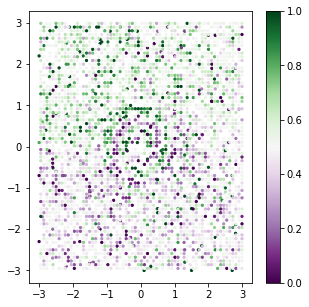

In [138]:
plt.figure(figsize=(5,5))

tempxy1 = pointwise_gridAverage(np.column_stack([ib.human[0][:,3], ib.human[0][:,5], ib.human[0][:,0]]))
tempxy2 = pointwise_gridAverage(np.column_stack([ib.human[0][:,3], ib.human[0][:,5], ib.human[0][:,6]]))
mlp = plt.scatter(x=tempxy1['x'], y=tempxy1['y'], c=tempxy1['c'], s=5, cmap='PRGn')
# plt.scatter(x=tempxy2['x'], y=tempxy2['y'], c=tempxy2['c'], s=5, cmap='PRGn')
plt.colorbar(mlp)

In [ ]:
ib.compute_hellinger(tempxy1)

In [132]:
# ib.human[0][:,0]
np.array([3,4,5])*0+1
ib.human[0][:,0]*0+1

array([1, 1, 1])

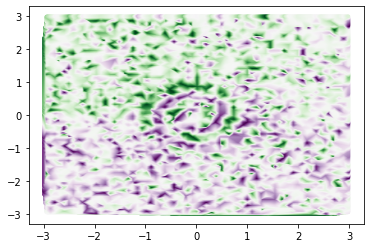

In [125]:
from scipy.interpolate import griddata
grid_near = griddata((tempxy1['x'], tempxy1['y']), tempxy1['c'], (uX0, uX1), method='linear', rescale=False)
plt.scatter(x=uX0, y=uX1, c=grid_near, s=5, cmap='PRGn')

In [113]:
tempxy1 = pointwise_gridAverage(np.column_stack([ib.human[0][:,3], ib.human[0][:,5], ib.human[0][:,6]]))
tempxy1

,x,y,c
0,-0.07,-0.16,0.212132
1,-0.07,-0.25,0.399059
2,-0.07,-0.34,0.000000
3,-0.07,-0.52,0.207107
4,-0.07,-0.61,0.000000
...,...,...,...
3492,2.99,2.54,0.500000
3493,2.99,2.63,0.507439
3494,2.99,2.72,0.000000
3495,2.99,2.90,0.252488


In [110]:
def pointwise_gridAverage(dat):
    dat = pd.DataFrame(dat, columns=['x', 'y', 'c']).astype(float)
    dat['xy'] = dat['x'].astype(str).str.cat(dat['y'].astype(str),sep=',')
    dat = dat.groupby('xy').mean().reset_index(drop=True)
    
    return dat

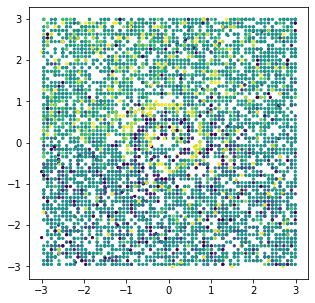

In [39]:
plt.figure(figsize=(5,5))
plt.scatter(x=ib.human[0][:,3], y=ib.human[0][:,5], c=ib.human[0][:,0], s=5)

In [17]:
ib.estpst_sample[0][0][:,0].shape

array([0.3125   , 0.3125   , 0.3125   , ..., 0.7578125, 0.7578125,
       0.7578125])

In [ ]:
ib.load_dataset(save=True)
ib.load_est(save=True)
ib.load_hellinger(save=True)
ib.load_clf(save=True)

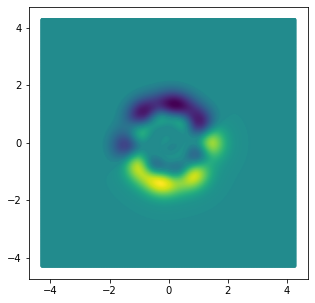

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(x=ib.mask[:,0],y=ib.mask[:,1],c=ib.estpst[1][2][0],s=1)

In [ ]:
seed = np.array([[],[],[]]).T
hdist_sample = [[seed for i in range(m)] for i in range(d)]

for j_i, j in enumerate([2,4]):
    for i in range(len(ib.mtype)):
        dat_temp = np.column_stack([uX, ib.hdist[1][j][i]])
        hdist_sample[j_i][i] = sample(hdist_sample[j_i][i], dat_temp, N_sample)

In [127]:
# ib.hdist

In [125]:
np.array(estpst_sample).shape

(2, 4, 205440, 3)

In [97]:
sample(temp, temp, 100).shape

(739700, 3)

In [83]:
ib.estpst[1][2][0].shape, ib.hdist[1][2][0].shape

((739600,), (739600,))

In [51]:
N_i = round(100/3600 * ib.estpst[1][0][3].shape[0])

In [40]:
ib.mask
ib.generate_mask(3,0.1)

array([[-3. , -3. ],
       [-2.9, -3. ],
       [-2.8, -3. ],
       ...,
       [ 2.7,  2.9],
       [ 2.8,  2.9],
       [ 2.9,  2.9]])

In [55]:
temp = np.column_stack([uX.round(2), ib.estpst[1][0][3]])
temp_idx = np.arange(0, temp.shape[0]+1,1)

idx_selected = np.random.choice(temp_idx , N_i)

np.vstack([dat, temp[idx_selected].shape])



(20544, 3)

In [79]:
temp_1 = np.array([[],[],[]]).T

In [80]:
temp_1

array([], shape=(0, 3), dtype=float64)

In [81]:
np.vstack([temp_1, temp])

array([[-4.30000000e+00, -4.30000000e+00,  3.63639671e-69],
       [-4.29000000e+00, -4.30000000e+00,  5.40049138e-69],
       [-4.28000000e+00, -4.30000000e+00,  8.01836277e-69],
       ...,
       [ 4.27000000e+00,  4.29000000e+00,  1.34942279e-59],
       [ 4.28000000e+00,  4.29000000e+00,  9.30031038e-60],
       [ 4.29000000e+00,  4.29000000e+00,  6.40821756e-60]])

In [8]:
# def ():
#     ib.get_dataset()
#     ib.get_clf()

#     pass